In [11]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [12]:
# read dataset

missing_val =['?','-']
df = pd.read_csv('adult.csv',na_values = missing_val)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# ADULT DATASET

#### This dataset contains all the details of Adults like race,gender,marital-status,income,age,native-country,occupation,education,etc.

We can find shape(rows and column) of the dataset:

In [3]:
a=df.shape[0]
print('the rows are:',a)
print('the columns are:',df.shape[1])

the rows are: 48842
the columns are: 15


In [25]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [30]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [31]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Full Description of dataset :-

In [32]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Deleting the column 'fnlwgt' :-

In [18]:
del df['fnlwgt']
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,NaN,Some-college,0.600000,Never-married,NaN,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K


#### Removing all row's who have missing values :-

In [19]:
df = df.dropna(how = 'any')
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


In [17]:
new_a=df.shape[0]
print('total no. of rows now:',new_a)
print('total no. of columns:',df.shape[1])

total no. of rows now: 45222
total no. of columns: 15


In [18]:
b =a-new_a
per=(b/a)*100
print('percentage of rows missing are:',per)

percentage of rows missing are: 7.411653904426519


#### OBSERVATIONS FOR MISSING VALUES :-
- THE TOTAL ROWS WERE '48842' AND THE ROWS LEFT AFTER REMOVING THE ROWS WHICH HAS MISSING VALUES ARE:'45222' 
- 74.1% ROWS ARE MISSING FROM DATASET.
- WHERE THERE IS NULL VALUES IN WORKCLASS THERE IS NULL VALUES IN OCCUPATION(IN SAME ROWS) AND THESE ROWS ARE REMOVED.
- THE ROWS REMOVED ARE 3620(48842-45222).

In [37]:
pd.crosstab(df['income'],df['gender'],normalize = 'index')

gender,Female,Male
income,,
<=50K,0.388185,0.611815
>50K,0.151365,0.848635


In [44]:
pd.crosstab(df['age'],df['marital-status'],normalize = 'index')

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
age,,,,,,,
17,0.000000,0.000000,0.004057,0.002028,0.993915,0.000000,0.000000
18,0.001439,0.000000,0.015827,0.002878,0.979856,0.000000,0.000000
19,0.009259,0.003472,0.019676,0.005787,0.954861,0.006944,0.000000
20,0.008734,0.000000,0.048035,0.003275,0.932314,0.007642,0.000000
21,0.010695,0.000000,0.073797,0.008556,0.897326,0.008556,0.001070
...,...,...,...,...,...,...,...
86,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
87,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
88,0.200000,0.000000,0.600000,0.000000,0.000000,0.000000,0.200000


#### OBSERVATIONS:-

As the age increases the Number of divorced people increases.
People start getting married as percentage of people in never-married decreases.

### BOX PLOTS FOR UNIVARIANT ANALYSIS :-

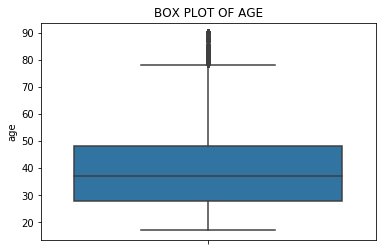

In [3]:
sbn.boxplot(y='age',data=df)

plt.title('BOX PLOT OF AGE')
plt.show()

#### OBSERVATIONS:

In this plot the 50% percentile is 38yrs and this also a MEDIAN.
The outliers lies between 79-90 yrs of age.
IQR lies between 27-48 yrs of age and equal to 21.
75% percentile is 48yrs.
25% percentile is 27yrs.

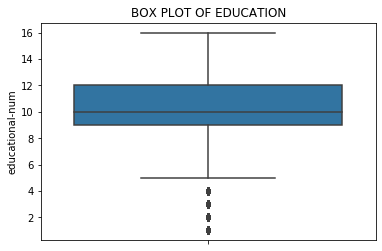

In [4]:
sbn.boxplot(y='educational-num',data=df)
plt.title('BOX PLOT OF EDUCATION')
plt.show()

#### OBSERVATIONS:

In this plot the 50% percentile is 10 and this also a MEDIAN.
The outliers lies between 1-5.
IQR lies between 9-12 and equal to 3.
75% percentile is 12.
25% percentile is 9.

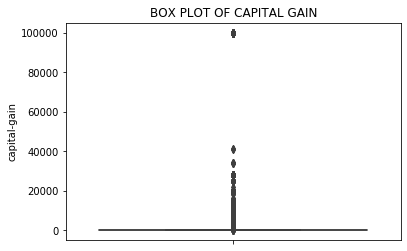

In [5]:
sbn.boxplot(y='capital-gain',data=df)
plt.title('BOX PLOT OF CAPITAL GAIN')
plt.show()

#### OBSERVATIONS:

Most of the values are zero.

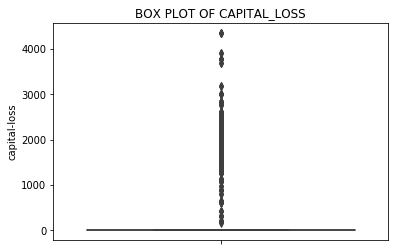

In [6]:
sbn.boxplot(y='capital-loss',data=df)
plt.title('BOX PLOT OF CAPITAL_LOSS')
plt.show()

#### OBSERVATIONS:-

Most of the values are zero.

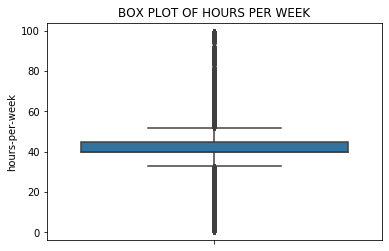

In [7]:
sbn.boxplot(y='hours-per-week',data=df)
plt.title('BOX PLOT OF HOURS PER WEEK')
plt.show()

#### OBSERVATIONS:

In this plot 
The outliers lies between 0-35 and 55-100.
IQR lies between 40-42 and equal to 2.
75% percentile is 42.
25% percentile is 40.

### COUNT PLOTS FOR UNIVARIANT ANALYSIS:-

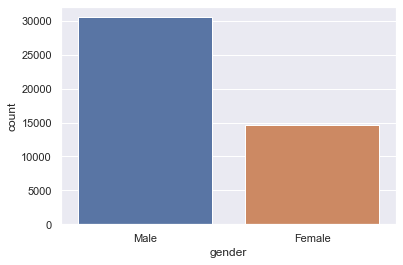

In [41]:
sbn.countplot(x='gender',data=df)
plt.show()

#### OBSERVATION:-

In this plot males are dominent to females. Males are ranging from (0-30000) in numbers. Females are ranging from (0-15000) in numbers. So,males are just double in numbers than females.

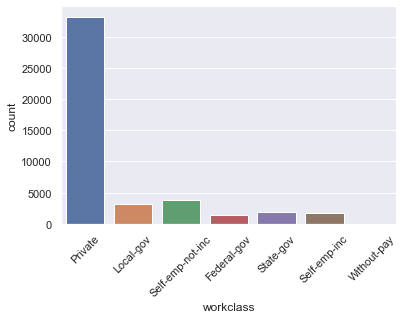

In [60]:
sbn.countplot(x='workclass',data=df)
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION:-

In this plot the number of people working in 'private sector' is maximum.
The no. of people working in 'without-gov sector' are minimum and has 0 number of people.
'private' ranges from (0-30000), 'local-gov' ranges from (0-3000), 'self-emp-not-inc' ranges from (0-4000), 'fedral-gov' ranges from (0-1000), 'state-gov' ranges from (0-2000), 'self-emp-inc' ranges from (0-1500), 'without-pay' are 0.

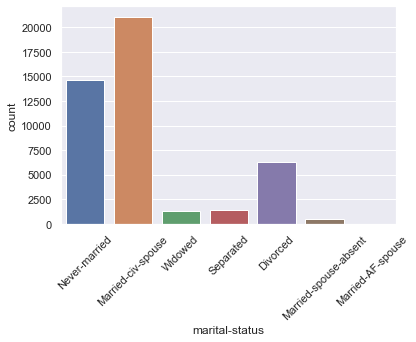

In [55]:
sbn.countplot(x='marital-status',data=df)
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION:-

In this plot married-civ-spouses are more in number than others.
The minimum number of people are in married-AF-spouse category and they are 0 in number,this means that there are no people in this category.
ranges:
married-civ-spouse: (0-25000)
never-married: (0-14000)
widowed: (0-1400)
seperated: (0-1500)
divorced: (0-6000)
married=spouse-absent: (0-1000)
married-AF-spouse: 0

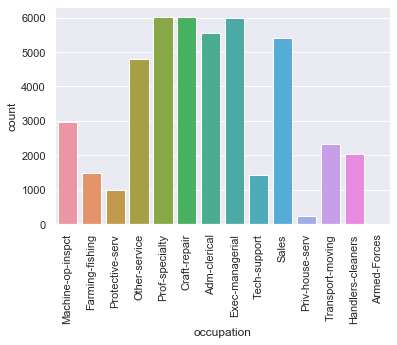

In [57]:
sbn.countplot(x='occupation',data=df)
plt.xticks(rotation=90)
plt.show()

#### OBSERVATIONS:-

in this plot'prof-speciality','craft-repair' and 'exec-manegrial' are at maximum number and these are at same position.
The armed-forces are at minimum number and has 0 number of people,this means nobody work in armed-forces sector in this dataset.
ranges: 'prof-speciality','craft-repair' and 'exec-manegrial': (0-6000).
'adm-clerical': (0-5500)
'sales': (0-5300)
'other-service': (0-4700)
'machine-operation-inspct': (-0-3000)
'transport-moving': (0-2200)
'handlers-cleaners': (0-2000)
'farming-fishing' and 'tech-support': (0-1400)
'protective-serv': (0-1000)
'priv-house-serv': (0-300)
'armed-forces': 0

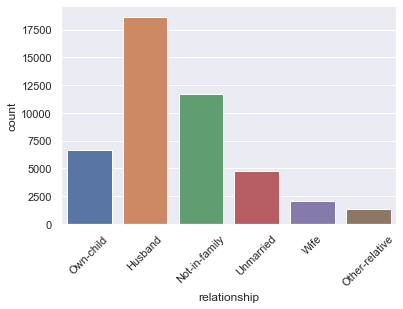

In [58]:
sbn.countplot(x='relationship',data=df)
plt.xticks(rotation=45)
plt.show()

#### OBSERVATIONS:-

In this plot 'husbands' are maximum in number than other relationship categories.
The minimum are 'other-relative category'.
ranges:
'husband': (0-above17500)
'not-in-family': (0-12000)
'own-child': (0-6000)
'unmarried': (0-4500)
'wife': (0-2000)
'other-relative': (0-1500)

### HISTOGRAM PLOTS FOR UNIVARIANT ANALYSIS :-

Text(0, 0.5, 'COUNTS')

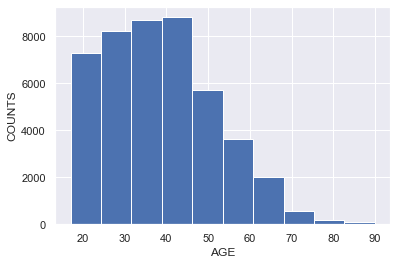

In [95]:
hist_plot=df['age'].hist(bins=10)
hist_plot.set_xlabel('AGE')
hist_plot.set_ylabel('COUNTS')

#### OBSERVATIONS:-

In this plot the maximum number of people are between 39 to 45 years of age group.
The minimum number of people are between 83 to 90 years of age group.
the graph increases from the age group of 16 years to 45 years and then decreases from 45 to 90 years gradually.

Text(0, 0.5, 'COUNTS')

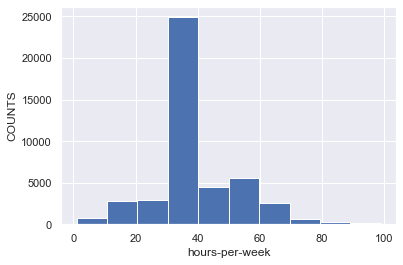

In [98]:
hist_plot=df['hours-per-week'].hist(bins=10)
hist_plot.set_xlabel('hours-per-week')
hist_plot.set_ylabel('COUNTS')

#### OBSERVATIONS:-

In this plot 25000 number of people work between 30-40 hours per week.
below 100 number of people work between 79-90 hours per week.
Initially the graph is increases and comes to peak  and gradually decreases.
lowest number of working hours are between 0-10 and number of people work in it are 250.

Text(0, 0.5, 'COUNTS')

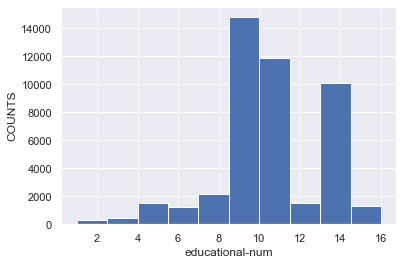

In [100]:
hist_plot=df['educational-num'].hist(bins=10)
hist_plot.set_xlabel('educational-num')
hist_plot.set_ylabel('COUNTS')

#### OBSERVATIONS:-

In this plot around 142000 number of people are between 8.5-10 educational-number.
And 300 number of people are between 1.5-2.5 educational-number.
the maximum educational number are between 14.5-16 and number of people between this range are around 1500.

### PAIRPLOTS FOR BIVARIANT ANALYSIS :-

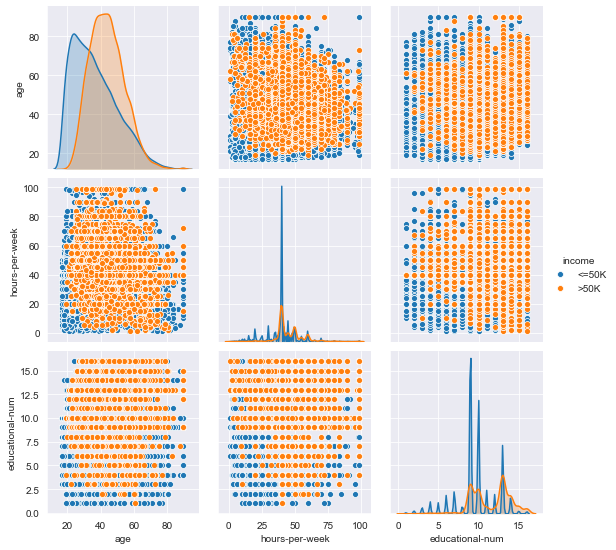

In [11]:
plt.close()
sbn.set_style('darkgrid')
sbn.pairplot(df,hue='income',vars=['age','hours-per-week','educational-num'])
plt.show()

#### OBSERVATION:-

Linear relationship unpedictable but 'age' and 'hours-per-week' are slightly predictable.

### BOX PLOTS FOR BIVARIANT ANALYSIS :-

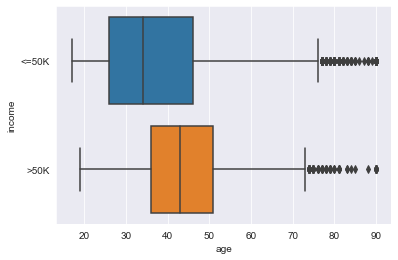

In [12]:
sbn.boxplot(x='age',y='income',data=df)
plt.show()

#### OBSERVATIONS:

#### BLUE BOX-
##### In this plot 
- The 50% percentile is 35yrs and this also a MEDIAN.
- The outliers lies between 75-90 yrs of age.
- IQR lies between 27-47 yrs of age and equal to 20.
- 75% percentile is 47yrs.
- 25% percentile is 27yrs.
#### ORANGE BOX-
##### In this plot 
- The 50% percentile is 42yrs and this also a MEDIAN.
- The outliers lies between 74-90 yrs of age.
- IQR lies between 36-51 yrs of age and equal to 15.
- 75% percentile is 51yrs.
- 25% percentile is 36yrs.

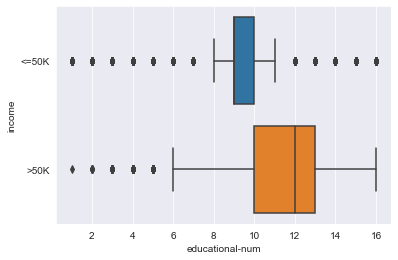

In [13]:
sbn.boxplot(x='educational-num',y='income',data=df)
plt.show()

#### OBSERVATIONS:

#### BLUE BOX-
##### In this plot
- The outliers lies between 1-7 and 12-16.
- IQR lies between 9-10 and equal to 1.
- 75% percentile is 10.
- 25% percentile is 9.
#### ORANGE BOX-
##### In this plot 
- The 50% percentile is 12 and this also a MEDIAN.
- The outliers lies between 1-5.
- IQR lies between 10-13 and equal to 3.
- 75% percentile is 13.
- 25% percentile is 10.

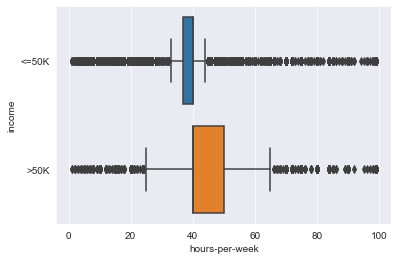

In [14]:
sbn.boxplot(x='hours-per-week',y='income',data=df)
plt.show()

#### OBSERVATIONS:

#### BLUE BOX-
##### In this plot 
- The outliers lies between 0-36 and 42-100.
- IQR lies between 38-40 and equal to 2.
- 75% percentile is 40.
- 25% percentile is 38.
#### ORANGE BOX-
##### In this plot 
- The outliers lies between 0-25 and 65-100.
- IQR lies between 40-50 and equal to 10.
- 75% percentile is 50.
- 25% percentile is 40.

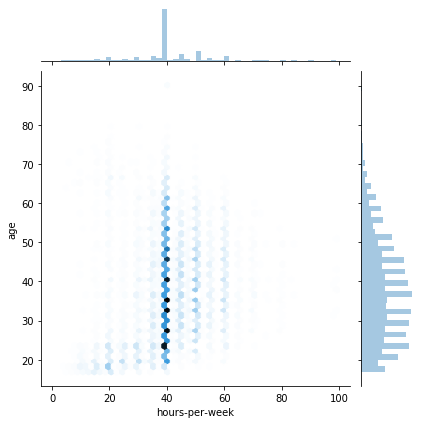

In [8]:
sbn.jointplot(x='hours-per-week',y='age',data=df,kind='hex')

#### OBSERVATIONS:

In this plot the people working around 40 hours per week of age group of 18-60yrs has the most darkest hexline.
Common region is between 40-50hours per week.

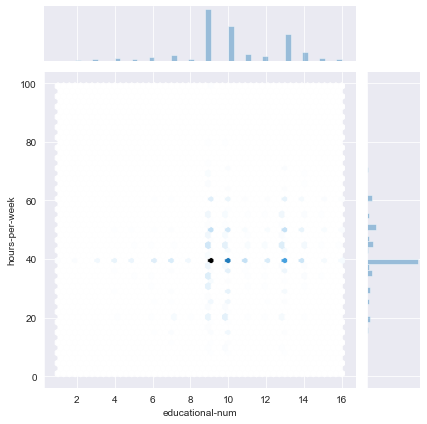

In [22]:
sbn.jointplot(x='educational-num',y='hours-per-week',data=df,kind='hex')

#### OBSERVATIONS:

In this plot the people working around 40 hours per week with educatinal-num of 9 has the most darkest hexline.
Common region is between 40-60 hours per week.

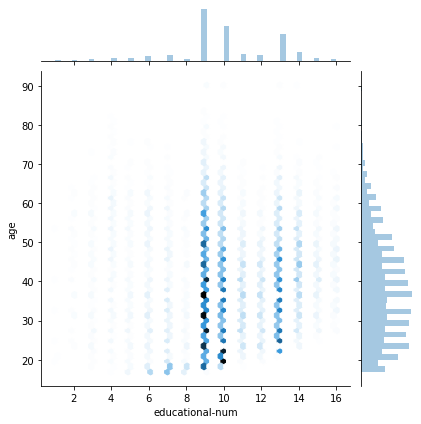

In [6]:
sbn.jointplot(x='educational-num',y='age',data=df,kind='hex')

#### OBSERVATIONS:

In this plot the people with educational-num of 9 of age group of 17-65yrs has the most darkest hexline.
Common region is between 9-13.

### CONCLUSION :
- This data-set contains 48852 rows and 15 columns initially.
- After removing the unwanted column and the rows with missing values the data set contains 45222 rows and 14 columns.
- 74.1% were missing values in data-set
- There are more entries of males than females.
- The work hours were between 1-100 hours and maximum people worked between 40-42 hours.
- The age group taken were between 18-90 years.
- Most people work in private sector.
- Most of them were husbands in dataset.
- Maximum people were of white race.
- The people who earn less than 50K :
  were between 27-47yrs and work between 38-40 hours per week.
- The people who earn more than 50K:
  were between 36-51yrs and work between 40-50 hours per week.


### NORMALIZATION:-

#### 1 FOR NUMERIC:-

In [27]:
x=df['age'].values.reshape(-1,1)
min_max_scaler=preprocessing.MinMaxScaler()
x_age=min_max_scaler.fit_transform(x)
df['age']=x_age

x=df['educational-num'].values.reshape(-1,1)
min_max_scaler=preprocessing.MinMaxScaler()
x_education=min_max_scaler.fit_transform(x)
df['educational-num']=x_education

x=df['capital-gain'].values.reshape(-1,1)
min_max_scaler=preprocessing.MinMaxScaler()
x_gain=min_max_scaler.fit_transform(x)
df['capital-gain']=x_gain

x=df['capital-loss'].values.reshape(-1,1)
min_max_scaler=preprocessing.MinMaxScaler()
x_loss=min_max_scaler.fit_transform(x)
df['capital-loss']=x_loss

x=df['hours-per-week'].values.reshape(-1,1)
min_max_scaler=preprocessing.MinMaxScaler()
x_hours=min_max_scaler.fit_transform(x)
df['hours-per-week']=x_hours

C:\Users\SB Info\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SB Info\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\SB Info\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

NameError: name 'warning' is not defined

In [25]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.011014,0.020339,0.407531
std,0.181067,0.170192,0.075065,0.092965,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### 2 FOR CATEGORIC:-

In [10]:
pd.get_dummies(df,columns=['workclass','education','marital-status','relationship','occupation','race','gender','native-country','income'],drop_first =True)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
48839,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


All the categoric rows are converted into numeric rows.